## Q4. Part (a):

In [0]:
import pandas as pd
import numpy as np

In [86]:
peru_data = pd.read_csv("/peru.txt", sep="\t")
peru_data.head()

,Age,Years,Weight,Height,Chin,Forearm,Calf,Pulse,Systol,Diastol
0,21,1,71.0,1629,8.0,7.0,12.7,88,170,76
1,22,6,56.5,1569,3.3,5.0,8.0,64,120,60
2,24,5,56.0,1561,3.3,1.3,4.3,68,125,75
3,24,1,61.0,1619,3.7,3.0,4.3,52,148,120
4,25,1,65.0,1566,9.0,12.7,20.7,72,140,78


In [0]:
from sklearn.linear_model import LinearRegression

age = peru_data["Age"].values

reg = LinearRegression().fit(age.reshape(-1, 1), peru_data["Systol"])

In [0]:
m = reg.coef_
c = reg.intercept_

Text(0, 0.5, 'Systol')

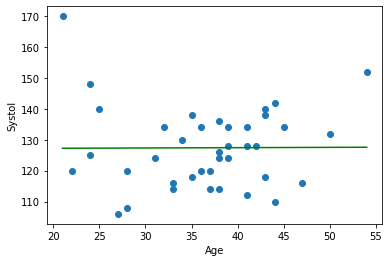

In [89]:
import matplotlib.pyplot as plt

plt.scatter(peru_data["Age"], peru_data["Systol"])
plt.plot(peru_data["Age"], m*peru_data["Age"]+c, color="green")
plt.xlabel("Age")
plt.ylabel("Systol")

**Conclusion:** There seems no trend between 'Age' and 'Systol' 

### Calculation of R-Squared and Adj. R-Squared

In [94]:
y =  peru_data["Systol"]
X = age.reshape(-1, 1)

y_hat = reg.predict(age.reshape(-1, 1))
SS_Residual = sum((y-y_hat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print ("R-Squared:", r_squared)
print ("Adj. R-Squared:", adjusted_r_squared)

R-Squared: 3.4161769114748886e-05
Adj. R-Squared: -0.02699194196685517


In [95]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Systol   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                  0.001264
Date:                Sat, 15 Feb 2020   Prob (F-statistic):              0.972
Time:                        21:05:35   Log-Likelihood:                -155.19
No. Observations:                  39   AIC:                             314.4
Df Residuals:                      37   BIC:                             317.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.0460     10.463     12.143      0.0

**Conclusion:** the p-value for Age (0.972) is greater than the common alpha level of 0.05, which indicates that it is not statistically significant.

### Part (b):

In [96]:
y =  peru_data["Systol"]
X = peru_data[["Age", "Pulse"]]

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Systol   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.3373
Date:                Sat, 15 Feb 2020   Prob (F-statistic):              0.716
Time:                        21:09:35   Log-Likelihood:                -154.83
No. Observations:                  39   AIC:                             315.7
Df Residuals:                      36   BIC:                             320.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.6104     18.441      6.215      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Result:** The model has improved very slightly judging from the increase in R2 score.

## Part (b): Calculation of Wald's Test t-statistic for coefficients

In [97]:
feat = peru_data[["Age", "Pulse"]].values
z = np.array(feat)
print(z)

[[21 88]
 [22 64]
 [24 68]
 [24 52]
 [25 72]
 [27 72]
 [28 64]
 [28 80]
 [31 76]
 [32 60]
 [33 68]
 [33 72]
 [34 88]
 [35 60]
 [35 60]
 [36 72]
 [36 84]
 [37 64]
 [37 72]
 [38 64]
 [38 80]
 [38 76]
 [38 60]
 [39 64]
 [39 64]
 [39 68]
 [41 76]
 [41 60]
 [41 76]
 [42 88]
 [43 72]
 [43 68]
 [43 60]
 [44 74]
 [44 72]
 [45 56]
 [47 64]
 [50 72]
 [54 92]]


In [98]:
one_vect = np.ones((39,1))
X = np.concatenate((one_vect, feat), axis=1)
print(X)

[[ 1. 21. 88.]
 [ 1. 22. 64.]
 [ 1. 24. 68.]
 [ 1. 24. 52.]
 [ 1. 25. 72.]
 [ 1. 27. 72.]
 [ 1. 28. 64.]
 [ 1. 28. 80.]
 [ 1. 31. 76.]
 [ 1. 32. 60.]
 [ 1. 33. 68.]
 [ 1. 33. 72.]
 [ 1. 34. 88.]
 [ 1. 35. 60.]
 [ 1. 35. 60.]
 [ 1. 36. 72.]
 [ 1. 36. 84.]
 [ 1. 37. 64.]
 [ 1. 37. 72.]
 [ 1. 38. 64.]
 [ 1. 38. 80.]
 [ 1. 38. 76.]
 [ 1. 38. 60.]
 [ 1. 39. 64.]
 [ 1. 39. 64.]
 [ 1. 39. 68.]
 [ 1. 41. 76.]
 [ 1. 41. 60.]
 [ 1. 41. 76.]
 [ 1. 42. 88.]
 [ 1. 43. 72.]
 [ 1. 43. 68.]
 [ 1. 43. 60.]
 [ 1. 44. 74.]
 [ 1. 44. 72.]
 [ 1. 45. 56.]
 [ 1. 47. 64.]
 [ 1. 50. 72.]
 [ 1. 54. 92.]]


In [99]:
X_dash = np.matmul(X.T, X)
print(X_dash)

[[3.90000e+01 1.42500e+03 2.74200e+03]
 [1.42500e+03 5.43130e+04 1.00440e+05]
 [2.74200e+03 1.00440e+05 1.96212e+05]]


In [100]:
X_dash_inv = np.linalg.inv(X_dash)
print(X_dash_inv)

[[ 1.90962723e+00 -1.40891690e-02 -1.94742510e-02]
 [-1.40891690e-02  4.48986860e-04 -3.29426277e-05]
 [-1.94742510e-02 -3.29426277e-05  2.94106139e-04]]


In [101]:
y = peru_data["Systol"].values
temp = np.matmul(X_dash_inv, X.T)
beta_hat = np.matmul(temp, y)

print(beta_hat)

[ 1.14610383e+02 -1.10683602e-02  1.87807250e-01]


In [103]:
var_hat = (1/(39-2-1))*np.matmul((y-np.matmul(X, beta_hat)).T , (y-np.matmul(X, beta_hat))) # Formula from Dobson-Barnett
print(var_hat)

178.0912434492695


In [104]:
var = ["const", "Age", "Pulse"]

for i in range(3):
  t = beta_hat[i]/np.sqrt(var_hat*X_dash_inv[i][i])
  print("t-statistic for", var[i],":", t)

t-statistic for const : 6.214817513291024
t-statistic for Age : -0.03914219597830208
t-statistic for Pulse : 0.8206141979675482


**Conclusion:** Both variables are not significant as t_crit(df=36) = 1.69 for alpha = 0.05. Pulse is more significant as compared to Age.


## Part (c): Likelihood Ratio Test

In [84]:
from scipy.stats.distributions import chi2

def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))

LR = likelihood_ratio(-155.19,-154.83)      #Using the log-likelihood results obtained above

p = chi2.sf(LR, 1) # L2 has 1 DoF more than L1

print ('p: %.30f' % p) 

p: 0.396143909152083639746422250028


**Conclusion**: Owing to high p-value, it can be concluded that model doesn't performs significantly better after addition of X9.

## Part (d)

In [0]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [0]:
peru_data["X3"] = peru_data["Years"]/peru_data["Age"] #Creating a new variable: X3

In [133]:
# Fit the model
model = ols("Systol ~ Age+Weight+Height+Chin+Forearm+Calf+Pulse+X3", peru_data).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Systol   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     4.834
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           0.000680
Time:                        22:29:14   Log-Likelihood:                -139.05
No. Observations:                  39   AIC:                             296.1
Df Residuals:                      30   BIC:                             311.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    131.4983     54.879      2.396      0.0

Conclusion: X3 and weight are significantly influencing Systolic BP. Chin, Age and Height also contribute reasonably to the model.



In [134]:
# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)


ANOVA results
            df       sum_sq      mean_sq          F    PR(>F)
Age        1.0     0.223125     0.223125   0.002346  0.961690
Weight     1.0  2160.881800  2160.881800  22.719984  0.000045
Height     1.0    23.729985    23.729985   0.249502  0.621070
Chin       1.0   305.331505   305.331505   3.210322  0.083268
Forearm    1.0    12.056690    12.056690   0.126767  0.724300
Calf       1.0    59.342722    59.342722   0.623942  0.435785
Pulse      1.0     5.549350     5.549350   0.058347  0.810771
X3         1.0  1111.041745  1111.041745  11.681736  0.001835
Residual  30.0  2853.278976    95.109299        NaN       NaN


Null Hypothesis for ANOVA is that the means of the independent variables are identical.

It may also be concluded that Weight, Chin and X3 are significant for alpha = 0.1.

### Part (e):

In [125]:
# Fit the model with significant parameters from part (d)
model = ols("Systol ~ Weight+X3+Chin+Age+Height", peru_data).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Systol   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     8.088
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           4.56e-05
Time:                        21:42:57   Log-Likelihood:                -139.60
No. Observations:                  39   AIC:                             291.2
Df Residuals:                      33   BIC:                             301.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.9065     49.263      2.454      0.0

In [132]:
# Fit the model with parameters X1, X2, X3, X4:
model = ols("Systol ~ Weight+X3+Age+Years", peru_data).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Systol   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     12.61
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           2.14e-06
Time:                        21:53:18   Log-Likelihood:                -137.45
No. Observations:                  39   AIC:                             284.9
Df Residuals:                      34   BIC:                             293.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.8354     21.980      5.316      0.0

In [131]:
model.conf_int(0.05)   # 95% confidence interval for parameters

,0,1
Intercept,72.167299,161.503413
Weight,0.272705,1.392107
X3,-165.646625,-50.499037
Age,-1.593752,-0.307579
Years,0.771527,3.906981


# Question 2:

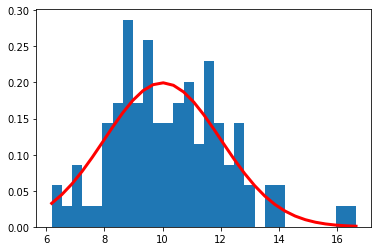

In [117]:
# Normal Distribution: N(10,4) 

import matplotlib.pyplot as plt

mu, sigma = 10, 2 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))*np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=3, color='r')

plt.show()

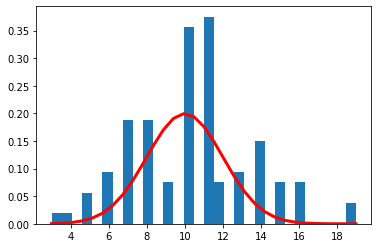

In [118]:
# Poisson Distribution: Poisson(10)

s_poisson = np.random.poisson(lam=10, size=100)

count, bins, ignored = plt.hist(s_poisson, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))*np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=3, color='r')

plt.show()

# Question 5:

In [119]:
import pandas as pd

salary_data = pd.read_csv("/salary.txt", delim_whitespace=True)
salary_data.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [120]:
# Coding the categorial variables

replace_map = {'sx': {'male': 0, 'female': 1}, 
               'rk':{'assistant':1, 'associate':2, 'full':3}, 
               'dg':{'doctorate':1, 'masters':0}}

salary_data_encoded = salary_data.replace(replace_map)

salary_data_encoded.head()

,sx,rk,yr,dg,yd,sl
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [121]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Fit the model
model = ols("sl ~ sx+rk+dg+yr", salary_data_encoded).fit()

# Print the summary
print(model.summary())

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:                     sl   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     64.33
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           1.80e-18
Time:                        21:35:39   Log-Likelihood:                -476.37
No. Observations:                  52   AIC:                             962.7
Df Residuals:                      47   BIC:                             972.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.11e+04   1087.116     10.212      0.0

ANOVA results show that all the independent variables sex, rank, degree and yr are statistically significant.

### Part (b) and (c):

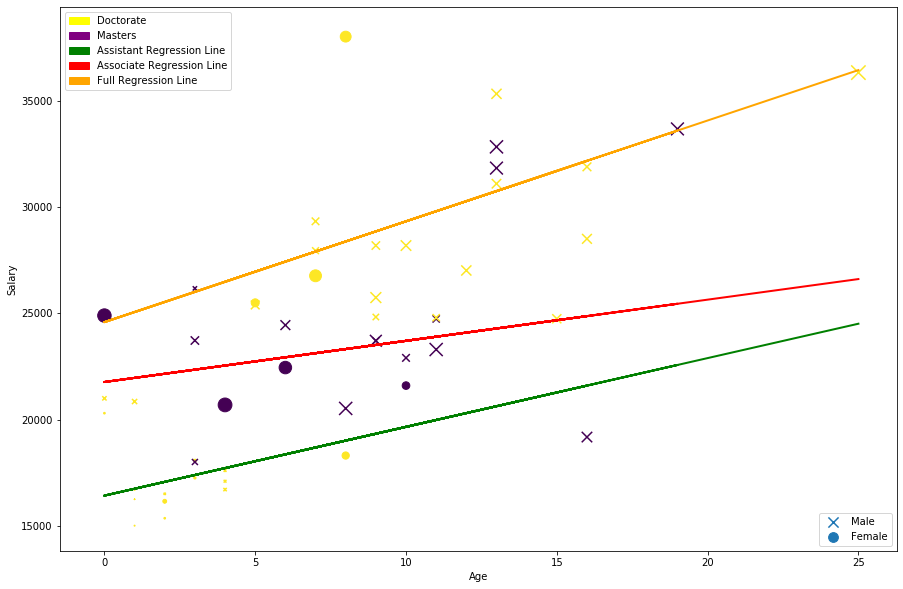

In [76]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

area = salary_data_encoded['yd']**1.5

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_xlabel('Age')
ax.set_ylabel('Salary')

scatter1 = ax.scatter(salary_data_encoded_m['yr'], salary_data_encoded_m['sl'], s=salary_data_encoded_m['yd']**1.5, marker='x', c=salary_data_encoded_m['dg'], label="Male")
scatter2 = ax.scatter(salary_data_encoded_f['yr'], salary_data_encoded_f['sl'], s=salary_data_encoded_f['yd']**1.5, marker='o', c=salary_data_encoded_f['dg'], label="Female")
sx_ass = ax.plot(salary_data_encoded['yr'], 16416 + 324*salary_data_encoded['yr'], color="green", linewidth=2)
sx_aso = ax.plot(salary_data_encoded['yr'], 21770 + 194*salary_data_encoded['yr'], color="red", linewidth=2)
sx_full = ax.plot(salary_data_encoded['yr'], 24592 + 475*salary_data_encoded['yr'], color="orange", linewidth=2)



# produce a legend with the unique colors from the scatter


red_patch = mpatches.Patch(color='yellow', label='Doctorate')
blue_patch = mpatches.Patch(color='purple', label='Masters')
red_patch2 = mpatches.Patch(color='red', label='Associate Regression Line')
blue_patch2 = mpatches.Patch(color='green', label='Assistant Regression Line')
red_patch3 = mpatches.Patch(color='orange', label='Full Regression Line')

legend1 = ax.legend(handles=[red_patch, blue_patch, blue_patch2, red_patch2, red_patch3])
ax.add_artist(legend1)
legend2 = ax.legend(loc="lower right")

plt.show()

**Conclusion**: Salary distribution among Professors follow a clear trend with Assistant<Associate<Full

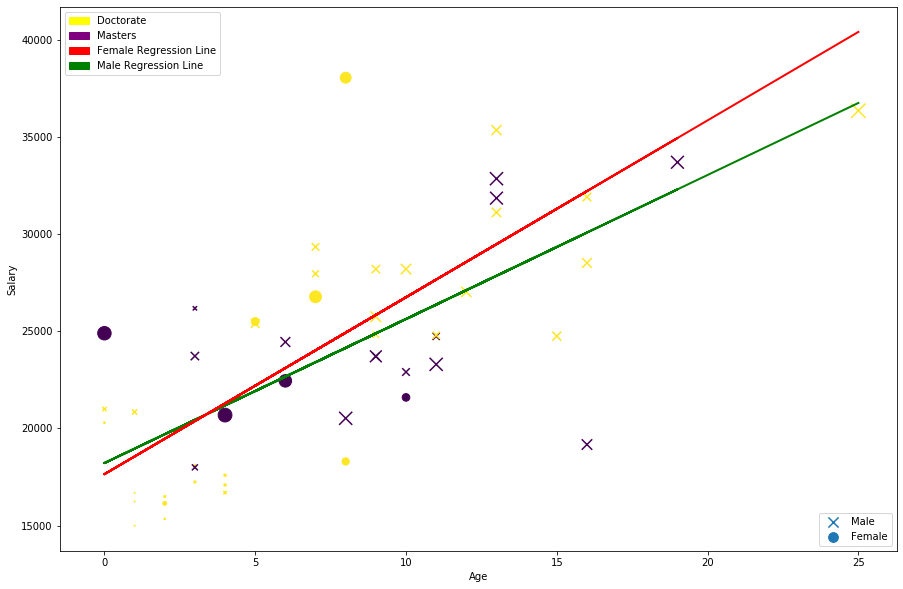

In [78]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

area = salary_data_encoded['yd']**1.5

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_xlabel('Age')
ax.set_ylabel('Salary')

salary = 11100 + 608*(salary_data_encoded['sx']) + 4753*(salary_data_encoded['rk']) - 134*(salary_data_encoded['dg']) + 391.84*(salary_data_encoded['yr'])


scatter1 = ax.scatter(salary_data_encoded_m['yr'], salary_data_encoded_m['sl'], s=salary_data_encoded_m['yd']**1.5, marker='x', c=salary_data_encoded_m['dg'], label="Male")
scatter2 = ax.scatter(salary_data_encoded_f['yr'], salary_data_encoded_f['sl'], s=salary_data_encoded_f['yd']**1.5, marker='o', c=salary_data_encoded_f['dg'], label="Female")
sx_m = ax.plot(salary_data_encoded['yr'], 18222 + 741*salary_data_encoded['yr'], color="green", linewidth= 2)
sx_f = ax.plot(salary_data_encoded['yr'], 17651 + 910*salary_data_encoded['yr'], color="red", linewidth=2)


red_patch = mpatches.Patch(color='yellow', label='Doctorate')
blue_patch = mpatches.Patch(color='purple', label='Masters')
red_patch2 = mpatches.Patch(color='red', label='Female Regression Line')
blue_patch2 = mpatches.Patch(color='green', label='Male Regression Line')

legend1 = ax.legend(handles=[red_patch, blue_patch, red_patch2, blue_patch2])
ax.add_artist(legend1)
legend2 = ax.legend(loc="lower right")

plt.show()

**Conclusion**: Female Professors are seen to earn more at senior-level as compared to their male counterparts.



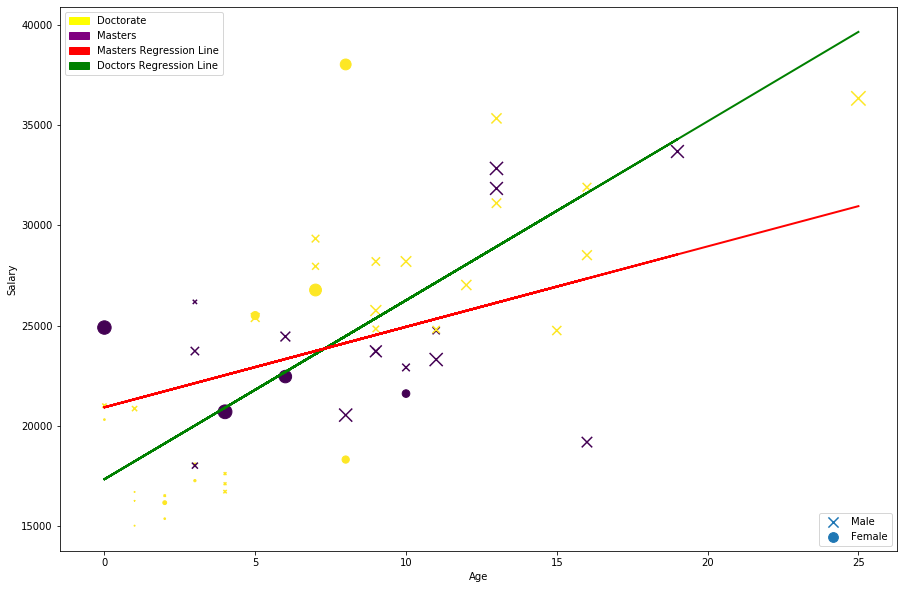

In [73]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

area = salary_data_encoded['yd']**1.5

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_xlabel('Age')
ax.set_ylabel('Salary')

scatter1 = ax.scatter(salary_data_encoded_m['yr'], salary_data_encoded_m['sl'], s=salary_data_encoded_m['yd']**1.5, marker='x', c=salary_data_encoded_m['dg'], label="Male")
scatter2 = ax.scatter(salary_data_encoded_f['yr'], salary_data_encoded_f['sl'], s=salary_data_encoded_f['yd']**1.5, marker='o', c=salary_data_encoded_f['dg'], label="Female")
sx_doc = ax.plot(salary_data_encoded['yr'], 17321 + 894*salary_data_encoded['yr'], color="green", linewidth= 2)
sx_mas = ax.plot(salary_data_encoded['yr'], 20915 + 402*salary_data_encoded['yr'], color="red", linewidth=2)


# produce a legend with the unique colors from the scatter


red_patch = mpatches.Patch(color='yellow', label='Doctorate')
blue_patch = mpatches.Patch(color='purple', label='Masters')
red_patch2 = mpatches.Patch(color='red', label='Masters Regression Line')
blue_patch2 = mpatches.Patch(color='green', label='Doctors Regression Line')

legend1 = ax.legend(handles=[red_patch, blue_patch, red_patch2, blue_patch2])
ax.add_artist(legend1)
legend2 = ax.legend(loc="lower right")

plt.show()

**Conclusion**: Professors with doctorate are seen to earn higher in the long-run.

### Necessary Calculations for above:

In [0]:
salary_data_encoded_m = salary_data_encoded[salary_data_encoded.sx == 0]
salary_data_encoded_f = salary_data_encoded[salary_data_encoded.sx == 1]

In [0]:
from sklearn.linear_model import LinearRegression
import numpy as np

x = salary_data_encoded_m["yr"].values

regx = LinearRegression().fit(x.reshape(-1, 1), salary_data_encoded_m["sl"])

In [38]:
print(regx.intercept_)
print(regx.coef_)

18222.583526062976
[741.02357232]


In [40]:
x = salary_data_encoded_f["yr"].values

regx = LinearRegression().fit(x.reshape(-1, 1), salary_data_encoded_f["sl"])

print(regx.intercept_)
print(regx.coef_)

17651.82919412063
[910.07704004]


In [0]:
salary_data_encoded_ass = salary_data_encoded[salary_data_encoded.rk == 1]
salary_data_encoded_aso = salary_data_encoded[salary_data_encoded.rk == 2]
salary_data_encoded_full = salary_data_encoded[salary_data_encoded.rk == 3]

In [66]:
x = salary_data_encoded_full["yr"].values

regx = LinearRegression().fit(x.reshape(-1, 1), salary_data_encoded_full["sl"])

print(regx.intercept_)
print(regx.coef_)

24592.982745871333
[475.67767644]


In [0]:
salary_data_encoded_mas = salary_data_encoded[salary_data_encoded.dg == 0]
salary_data_encoded_doc = salary_data_encoded[salary_data_encoded.dg == 1]

In [69]:
x = salary_data_encoded_mas["yr"].values

regx = LinearRegression().fit(x.reshape(-1, 1), salary_data_encoded_mas["sl"])

print(regx.intercept_)
print(regx.coef_)

20915.552325581397
[402.50687104]


In [70]:
x = salary_data_encoded_doc["yr"].values

regx = LinearRegression().fit(x.reshape(-1, 1), salary_data_encoded_doc["sl"])

print(regx.intercept_)
print(regx.coef_)

17321.091937347195
[894.02074098]
